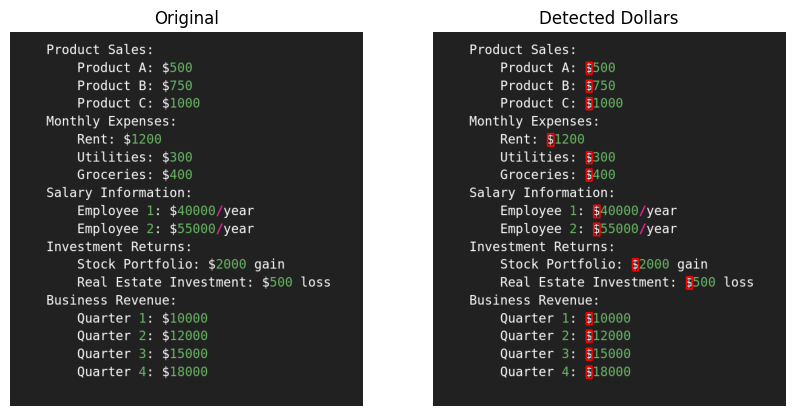

In [3]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

# To read a single image
def read_img(img):
    img_path = rf'./imgs/{img}'
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# To display single image
def display_img(img, title=None, cmap=None):
    plt.imshow(img, cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# To convert to RGB Image
def rgb_img(img):
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return rgb

# To convert to Grayscale Image
def gray_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

# To remove noise from the image
def denoise_img(img):
    denoise = cv2.medianBlur(img, 5)
    return denoise

# Threshold Image
def thresh_img(img):
    threshold_value = 127
    thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    # thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # print(thresh[0])
    return thresh[1]

# To plot images in custom subplots, default is 10x3 format
# pass arrays of images and titles
def subplot_img(imgs=None, titles=None, x=7, y=2):
    for i in range(0, len(imgs)):
        plt.subplot(x,y,i+1)
        # plt.imshow(imgs[i], cmap='gray')
        plt.imshow(rgb_img(imgs[i]), cmap='gray')
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.gcf().set_size_inches(10, 40)
    plt.show()

def draw_rec(img, coords, color=(0,0,255), thickness=3):
    img = img.copy()
    rec = cv2.rectangle(img, (coords[0], coords[1]), (coords[2], coords[3]), color=color, thickness=thickness)
    return rec

def ocr_text(img):
    text = pytesseract.image_to_string(img)
    return text.strip()

def ocr_coords(img):
    coords = pytesseract.image_to_boxes(img)
    return coords


def draw_recs_dollar(image):
    image = image.copy()
    text_data = pytesseract.image_to_boxes(image)
    target_character = '$'
    
    for char_info in text_data.splitlines():
        char, x, y, w, h, _ = char_info.split(' ')
        x, y, w, h = int(x), int(y), int(w), int(h)
        if char == target_character:
            sym = cv2.rectangle(image, (x, image.shape[0] - y), (w, image.shape[0] - h), (0, 0, 255), 2)
    return sym


img_name = 'img2.png'
oimg = read_img(img_name)

if ocr_text(oimg):
    rec = draw_recs_dollar(oimg)
    subplot_img([oimg, rec], ['Original', 'Detected Dollars'])
else:
    print('No Dollar Symbols Found')
    


In [7]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

# To read a single image
def read_img(img):
    img_path = rf'./imgs/{img}'
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# To display single image
def display_img(img, title=None, cmap=None):
    plt.imshow(img, cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# To convert to RGB Image
def rgb_img(img):
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return rgb

# To convert to Grayscale Image
def gray_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

# To remove noise from the image
def denoise_img(img):
    denoise = cv2.medianBlur(img, 5)
    return denoise

# Threshold Image
def thresh_img(img):
    threshold_value = 127
    thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    return thresh[1]

# To plot images in custom subplots, default is 10x3 format
# pass arrays of images and titles
def subplot_img(imgs=None, titles=None, x=7, y=2):
    for i in range(0, len(imgs)):
        plt.subplot(x,y,i+1)
        # plt.imshow(imgs[i], cmap='gray')
        plt.imshow(rgb_img(imgs[i]), cmap='gray')
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.gcf().set_size_inches(10, 40)
    plt.show()

def draw_rec(img, coords, color=(0,0,255), thickness=3):
    img = img.copy()
    rec = cv2.rectangle(img, (coords[0], coords[1]), (coords[2], coords[3]), color=color, thickness=thickness)
    return rec

def ocr_text(img):
    text = pytesseract.image_to_string(img)
    return text.strip()

def ocr_coords(img):
    coords = pytesseract.image_to_boxes(img)
    return coords

def draw_recs_dollar(frame):
    frame_copy = frame.copy()
    text_data = pytesseract.image_to_boxes(frame_copy)
    target_character = '$'
    
    for char_info in text_data.splitlines():
        char, x, y, w, h, _ = char_info.split(' ')
        x, y, w, h = int(x), int(y), int(w), int(h)
        if char == target_character:
            cv2.rectangle(frame_copy, (x, frame_copy.shape[0] - y), (w, frame_copy.shape[0] - h), (0, 0, 255), 2)
    return frame_copy

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    frame_with_rects = draw_recs_dollar(frame)
    cv2.imshow("Dollar Symbol Detection", frame_with_rects)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()